---
title: Entertain_with_Seaborn

date: 2018-10-02 18:11:40

category: 有趣的东西

tags:
 - Visualization
---

今天我们来接触一下一个基于matplotlib的可视化python库：seaborn
这里是官方的地址~[seaborn's home](http://seaborn.pydata.org/) 这里是API  [Seaborn's API](http://seaborn.pydata.org/api.html)
版本是 0.9.0

## 0. 题外话
* 通过conda安装: 
`conda install seaborn`
* 为了交互式的运行，本篇博客将在Jupyter notebook 内实现。

## 1. Let's Start

In [3]:
import seaborn as sns
sns.set()  # 通过设置里面的参数可以修改图片的风格
tips = sns.load_dataset("tips", cache=False) 
# load_dataset 从https://raw.githubusercontent.com/mwaskom/seaborn-data/master下载csv
# cache默认为True，会将文件下载到参数data_home所指的地址
# 当cache为True时，若保存的地址有中文，很有可能出现pandas.read_csv的OSError
tips.head() # 展示前五行数据

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


此数据集显示了不同人在不同情况下用餐之后给与小费的数量 

可以看到前五行数据如上，下面我们尝试用seaborn画图

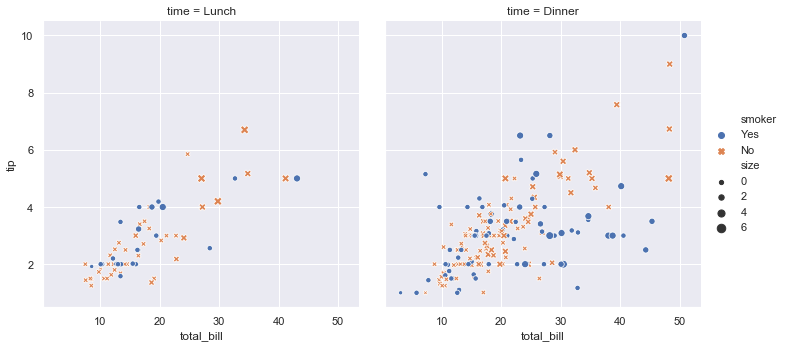

In [4]:
sns.relplot(x="total_bill", y="tip",col="time",hue="smoker",style="smoker",size="size",data=tips)

这只是我们一个简单的探索，下面我们从最简单的函数开始

## 2. 用sns.relplot分析散点图

当我们处理数据的时候，往往要分析不同数据之间的关系，即数据之间是如何相互关联的。而可视化就是一个能极大方便人分析数据的过程，通过可视化我们可以轻而易举的看出数据之间的隐含关系

在开始之前，我们先介绍两种函数：
* *Figure-level function*
  *  返回值类型是 seaborn.FacetGrid，个人理解是包含多个ax轴的图，即包含多个axes-level function的图，可以在一张图内展示多个特征之间的关系
* *axes-level function*
  *  返回值为ax,个人理解是包含一对特征关系的图，是构建Figure-level function的成员
 
-----

我们第一个要讨论的函数为:
`sns.relplot()`
这是一个Figure_level function，是FacetGird包含了`sns.scatterplot`和`sns.lineplot()`的产物，通过设置默认参数`king="scatter"` or `"line"`可以修改散点图 or 直线图。

我们从下面的语句开始

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 之前已经有import seaborn
sns.set(style="darkgrid") # 设置 axes_style为darkgrid

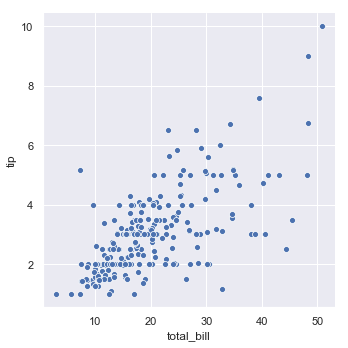

In [8]:
sns.relplot(x="total_bill", y="tip", data=tips)
# 读者可以尝试令参数 kind="line" 会出现"神奇"的效果

上面的例子我们将tips中的点用2个维度进行了绘图，这看起来不错。

不过，这样并不能满足进一步的数据分析的需求，我们seaborn优秀的绘图能力还没有完全展现，让我们来尝试下面的语句：

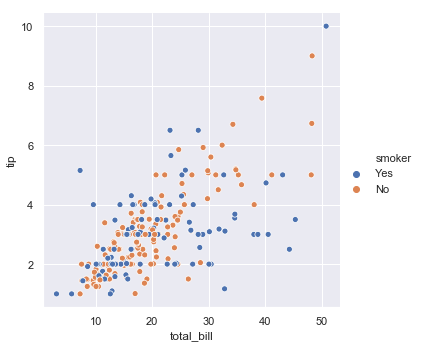

In [10]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips)

* 这次我们使用了一个参数`hue="smoker"`，`hue`这个参数提供了给图中不同种类的点着色的功能。可以看出，这个参数获得的是data中某一列header的名字(此处我们传入的是data中的"smoker"一列)。有趣的是，传入的除了二元特征也可以是多元特征，甚至可以是连续值特征。传入的是连续值时，颜色会呈现渐变变化

* 可以尝试下面的语句

`sns.relplot(x="total_bill", y="tip", hue="size", data=tips)`

* 另外再通过给参数`palette`传值可以修改点颜色，具体使用时可以参考api。另外也可以在`sns.set()`内传参修改点的颜色

然后我们尝试传入style参数：

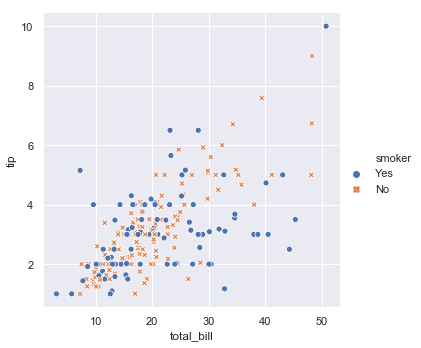

In [13]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker",data=tips)

* style参数影响了图中点的样式，传入参数依然为data中数据的名字，如上图所示，smoker为Yes的点是圆形点，而No的值则是叉点
* 同样的，style参数也可以传入连续值特征，不过绝大多数情况下不会用到

但是对于smoker特征来说，颜色已经足够区分，我们不妨用style来区分另一个特征 "time"

可以尝试：`sns.relplot(x="total_bill", y="tip", hue="smoker", style="time",data=tips)`

* 这样我们的图片中的点已经可以展示很大的信息量了，不过seaborn还不止于此，我们还可以通过传入`size`参数的值改变点的大小：

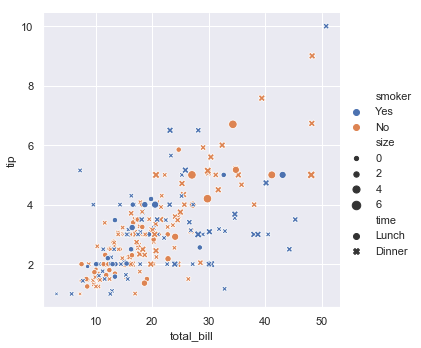

In [28]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", size="size", data=tips)

* `size`参数的使用和上面提及的其他参数是基本一致的
* 此外，通过给另一个参数`sizes`传值可以修改点大小的分布，传入的可以是dict/list/tuple，传入dict时要求dict内对每种size的值进行mapping，即dict={(sizeValue, size).....}，而使用list/tuple则需要指定点最大最小值

可以尝试 `sns.relplot(x="total_bill", y="tip", size="size", sizes=(15, 200), data=tips)`

下面使用`col`,`row`参数：

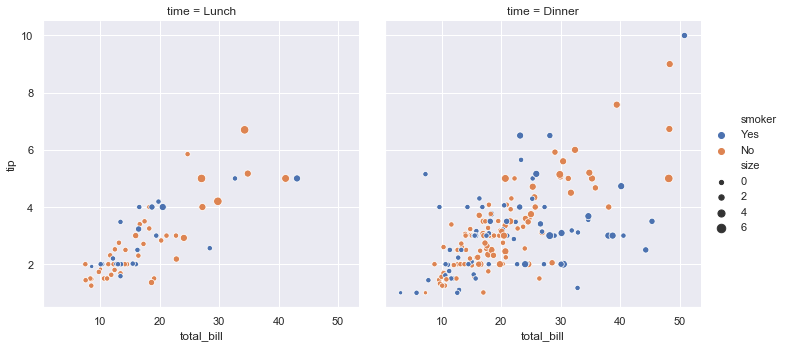

In [80]:
sns.relplot(x="total_bill", y="tip", hue="smoker", col="time", size="size", data=tips)

* 很容易可以看出，令`col = "time"`时，会根据"time"值的不同在其他列生成图片。令`row = "timw"`,则会在不同行生成图片

## 3. 用relplot分析连线图

当我们要仔细的研究数据的变化情况时，连线图就比散点图更加方便

当然我们可以直接用sns.lineplot()绘制，不过我们依然延续上面的内容，用`sns.relplot(kind="line".....)` 来绘制连线图

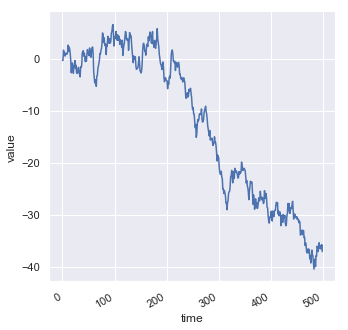

In [51]:
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))
# np.cumsum(Array)返回一个和Array同shape的np.darray
#其中第n个元素为Array的前n项和
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate() # x轴数值斜体化

* 我们随机生成了一个dataFrame，横轴为1-500的整数，纵轴为生成随机数的前time项和。值得注意的是，seaborn在处理数据时，会有序的将(x, y)数据对根据 *x的大小* 进行排列，即默认参数`sort=True`，如果我们不需要这样的功能，可以置参数为`False` 

可以尝试下面的代码：

```
df = pd.DataFrame(np.random.randn(500, 2).cumsum(axis=0), columns=["x", "y"])
sns.relplot(x="x", y="y", sort=False, kind="line", data=df)
```

有时候当一个x对应多个y值的时候，seaborn会有自己独特地处理方式，我们可以先看下面的代码

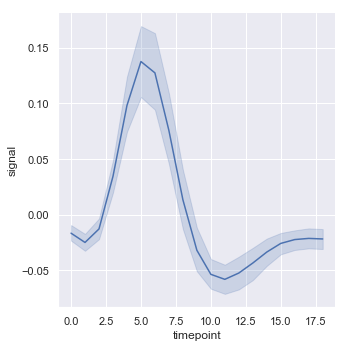

In [53]:
fmri = sns.load_dataset("fmri", cache=False)
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri)

* 可以看出，seaborn将y值的平均值标记了出来，并且绘制出了95%的置信区间。
* 若要去去除置信区间的显示，可以令`ci=None`(ci->confidence intervals)

`sns.relplot(x="timepoint", y="signal", ci=None, kind="line", data=fmri)`

* 不同的ci参数的设置可以有不同的效果，具体情况可以查看api

* 如果不需要计算mean值，可以令`estimator=None`，不过会有奇怪的效果

-----

和散点图一样，我们也可以通过传入hue,style等等参数来在一张图中显示多维度的数据
例如下面的语句：

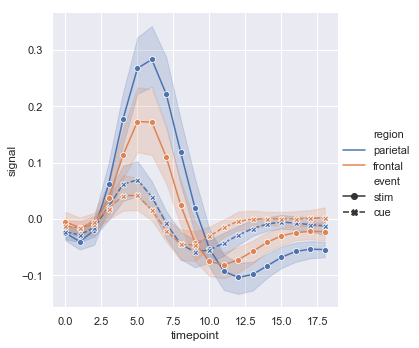

In [63]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            markers=True, kind="line", data=fmri);

* 类似的，hue参数改变颜色，style改变线的虚实(若dashes=False,则不会有虚实线的区别)，markers会给图中的点标出
* 对于连线图而言，将hue与style所指的特征列设置为相同的能使图像看起来更加明晰
`sns.relplot(x="timepoint", y="signal", hue="event", style="event",kind="line", data=fmri)`

* 接下来我们介绍一下`units`这个参数，通过设定它可以在一张图内画出多条直线：令`units="subject"`可以根据subject属性的不同画出不同的曲线，即根据subject的值进行取样

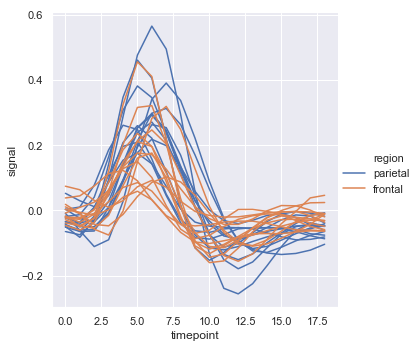

In [75]:
sns.relplot(x="timepoint", y="signal", hue="region",
            units="subject", estimator=None,
            kind="line", data=fmri.query("event == 'stim'"))
# pd.query("event == 'stim'")为pd中event属性为'stim'的部分

* 由于subject属性非常多，所以我们的曲线变得十分的复杂，仅用这个例子介绍units参数的作用

最后利用pd.data_range()函数来绘出时间数据：

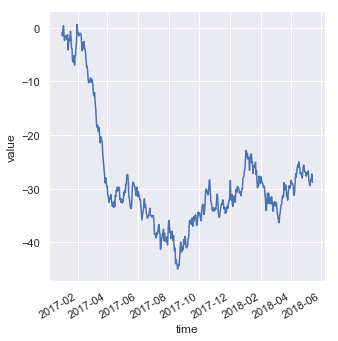

In [77]:
df = pd.DataFrame(dict(time=pd.date_range("2017-1-1", periods=500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()